In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# render the plot inline, instead of in a separate window
%matplotlib inline

df = pd.read_csv("D:/L4S1/DataMining/MiniProject/data/pima-data.csv")
df.shape # take a look at the shape
def plot_corr(df,size=11): 

    corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    
df.corr()

del df['skin']

diabetes_map = {True:1, False:0}

df['diabetes']=df['diabetes'].map(diabetes_map)

#split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

df[['glucose_conc', 'diastolic_bp', 'bmi']] = df[['glucose_conc', 'diastolic_bp', 'bmi']].replace(0, numpy.NaN)
df.fillna(df.mean(), inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution




Accuracy on training set: 1.000
Accuracy on test set: 0.680


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy:0.7619

Accuracy on training set: 1.0000
Accuracy on test set: 0.6797
Confusion Matrix
[[128  23]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.60      0.64        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,lr_predict_test ))

print("RMSE = ",rms)

RMSE 0.4879500364742666


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1st max value of 0.625 occured at C=1.100


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'recall score')

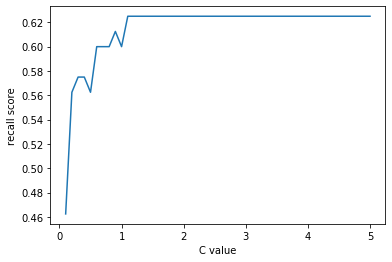

In [34]:
# This section will try C value from 0.1 to 4.9 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data. 
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))


# Let's plot the changes in C-values against recall scores to see how the regularization scores impact the recall score

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [31]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.680


In [48]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.7635
Accuracy on test set: 0.7186


In [26]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.62844437 0.         0.         0.         0.17361277
 0.01055959 0.18738328]


In [42]:
tree.fit(X_train,y_train.ravel())
tree_predict_test = tree.predict(X_test)
# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,tree_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,tree_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,tree_predict_test))

Accuracy:0.6797

Confusion Matrix
[[106  45]
 [ 29  51]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       151
           1       0.53      0.64      0.58        80

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,tree_predict_test))

print("RMSE = ",rms)

RMSE =  0.5659914490045943


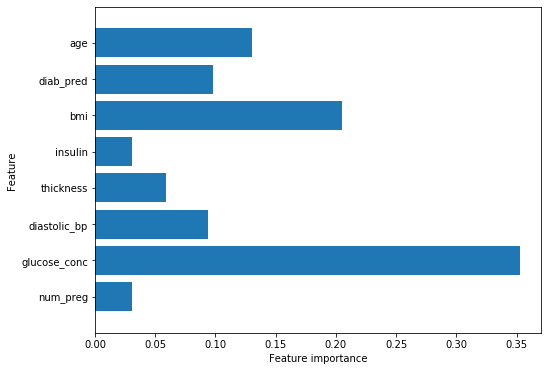

In [35]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')
